In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [14]:
a = [-5,-4,-3,-3,-2,-2,-1,-1,-1,0,0,0,0,0,1,1,1,2]
b = [-3,-2,-1,-1,-1,-1,0,0,0,0,0,0,1,1,1,1,2,3]
c = [-2,-1,-1,-1,0,0,0,0,0,1,1,1,2,2,3,3,4,5,]
data={'col1':a,'col2':b,'col3':c}
data

{'col1': [-5, -4, -3, -3, -2, -2, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 2],
 'col2': [-3, -2, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3],
 'col3': [-2, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 5]}

In [ ]:
boston = pd.read_csv('boston-housing.csv',header = None, sep = r'\s+')
print("===데이터 개요===")
print(f'데이터 크기: {boston.shape}')
# 변수 설명 딕셔너리
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}


===데이터 개요===
데이터 크기: (506, 14)


In [ ]:
print('='*50)
print(f'종합 데이터 품질 리포트')
print('='*50)
print(f'-데이터 크기:{boston.shape[0]}행 x{boston.shape[1]}열')
print(f'-메모리 사용량: {boston.memory_usage(deep=True).sum()/1024**2 :.2f}mb')
boston.isna().sum()
# 2. 결측값 분석
print(f'\n2. 결측값 분석')
missing_info = boston.isnull().sum()
m_pct = (missing_info / len(boston)) * 100
if missing_info.sum() == 0:
    print('✅ 결측값 없음. 완전')
else:
    print('⚠️')
    missing_sum = pd.DataFrame({
        '결축수': missing_info,
        '결측율(%)': m_pct,
    }).round(2)
    missing_sum = missing_sum[missing_sum['결측수'] > 0]
    display(missing_sum)

print(f'\n3.수치형 변수 품질 분석')
num_cols = boston.select_dtypes(include=['number']).columns
quality_report = []
for col in num_cols:
    col_data = boston[col].dropna()
    stats = {
        '변수명': col,
        '평균': col_data.mean(),
        '최솟값': col_data.min(),
        '최댓값': col_data.max(),
        '왜도': col_data.skew(),
        '첨도': col_data.kurtosis()
    }
    # 이상값 비율 (IQR)
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    mask = (col_data < Q1 -1.5*IQR) | (col_data >Q1 +1.5* IQR)
    outliers = col_data[mask]
    stats['이상값비율(%)'] = (col_data)



종합 데이터 품질 리포트
-데이터 크기:506행 x14열
-메모리 사용량: 0.05mb

2. 결측값 분석
✅ 결측값 없음. 완전

3.수치형 변수 품질 분석


In [47]:
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

In [48]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

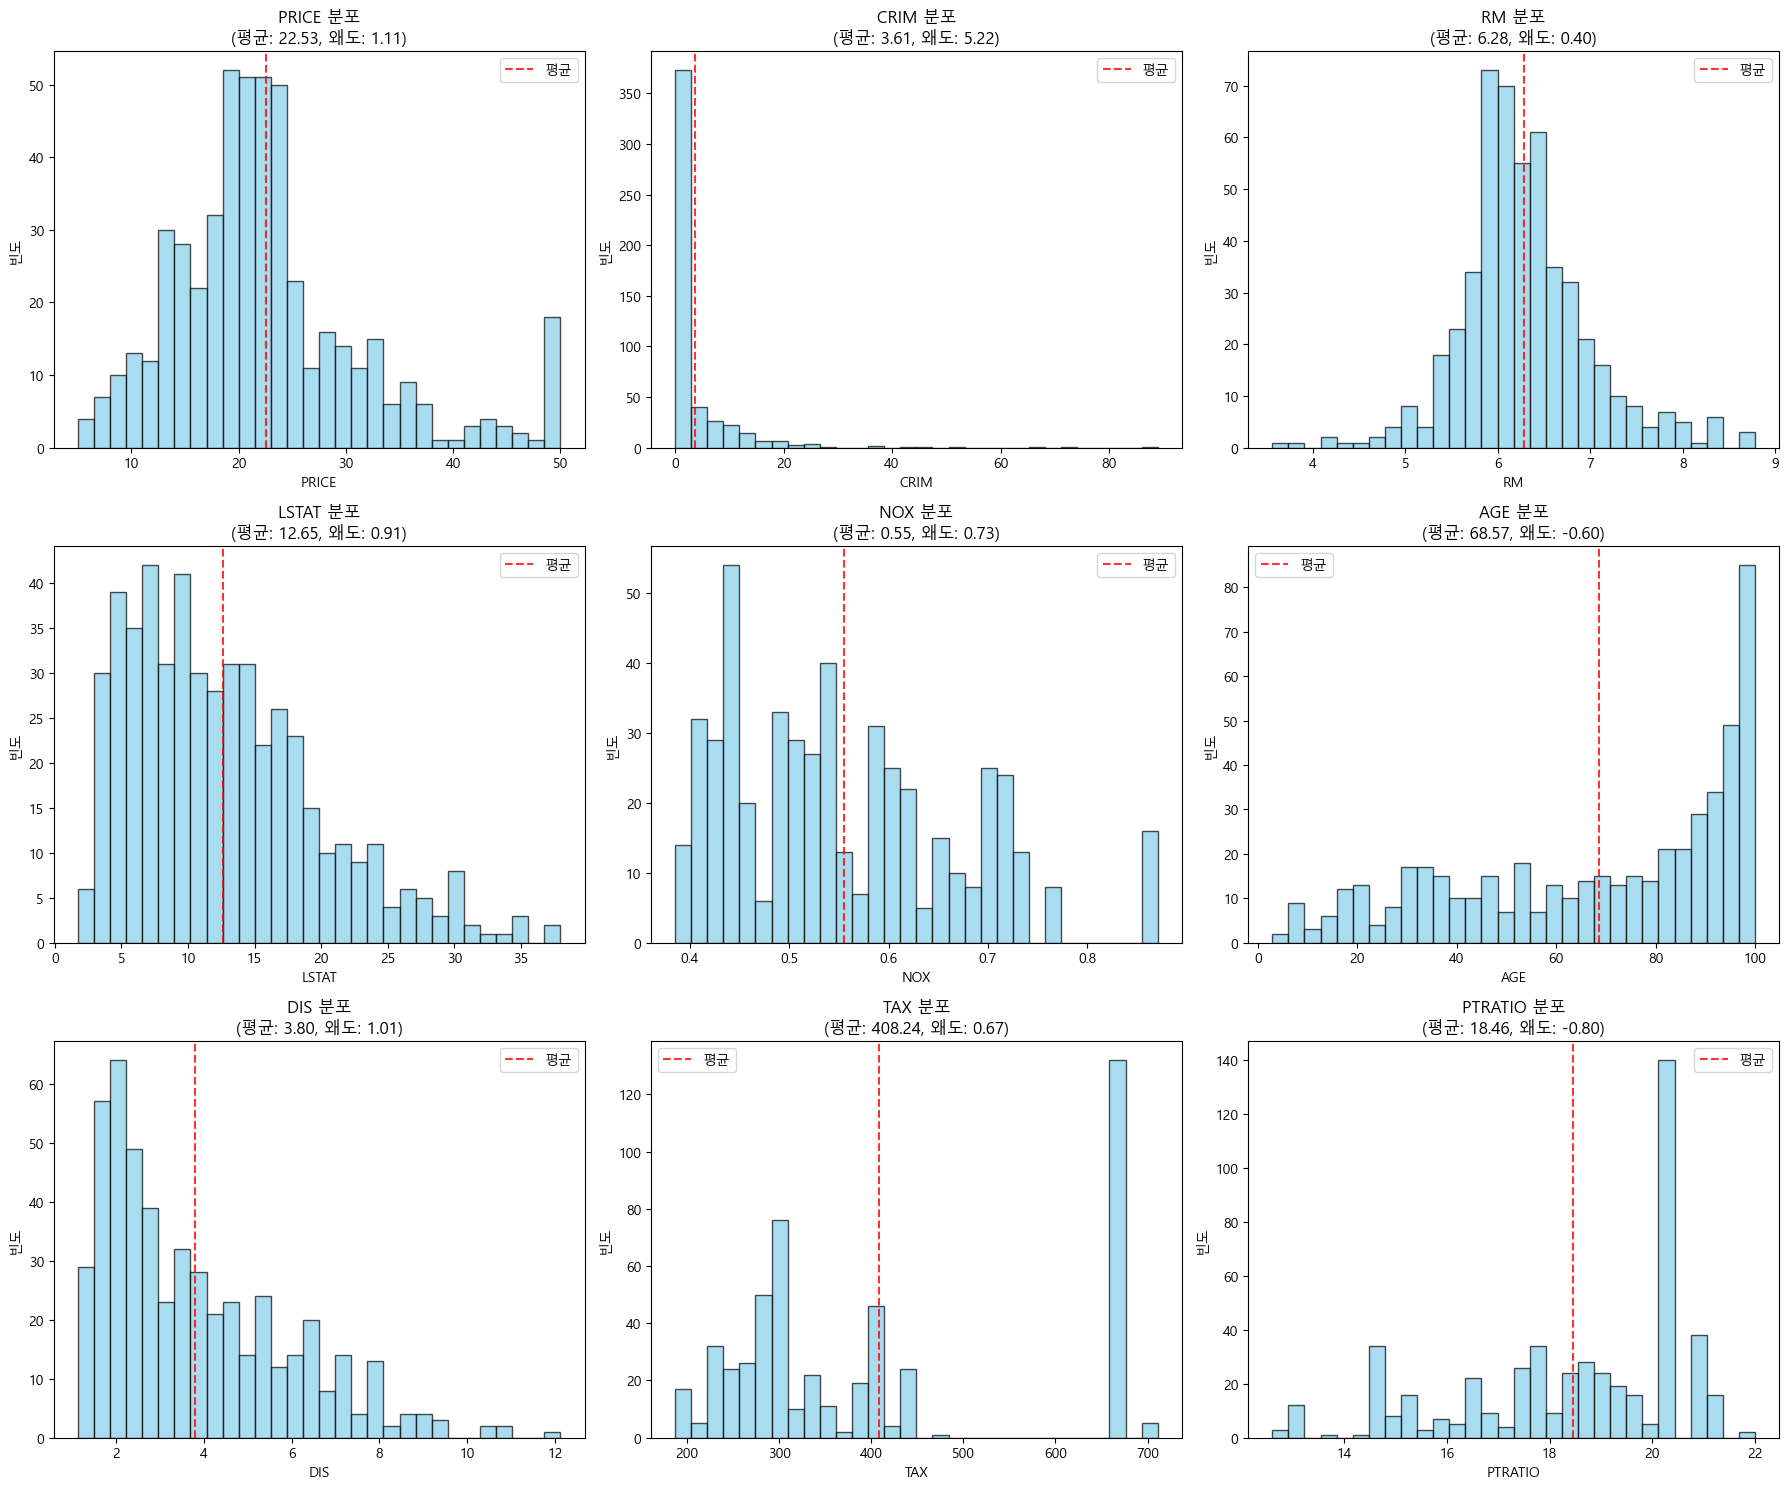

In [49]:
# 3단계: 시각적 품질 진단
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# 주요 변수들의 분포 시각화
key_vars = ['PRICE', 'CRIM', 'RM', 'LSTAT', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']

for i, var in enumerate(key_vars):
    if i < len(axes):
        # 히스토그램과 박스플롯 조합
        ax = axes[i]
        
        # 히스토그램
        ax.hist(boston[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{var} 분포\n(평균: {boston[var].mean():.2f}, 왜도: {boston[var].skew():.2f})')
        ax.set_xlabel(var)
        ax.set_ylabel('빈도')
        
        # 평균선 표시
        ax.axvline(boston[var].mean(), color='red', linestyle='--', alpha=0.8, label='평균')
        ax.legend()

plt.tight_layout()
plt.show()

In [54]:
# 데이터 타입별 분석
print(f'\n3. 수치형 변수 품질 분석')
num_cols = boston.select_dtypes(include = ['number']).columns
num_cols


3. 수치형 변수 품질 분석


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [44]:
boston.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [ ]:
fig, axes = plt.subplot(3,3, figsize = (18,15))
axes = axes.ravel()
key_valrs = 

col1   -0.234597
col2    0.620588
col3   -0.234597
dtype: float64

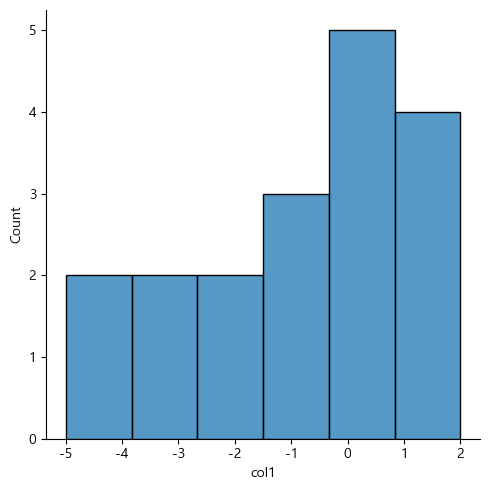

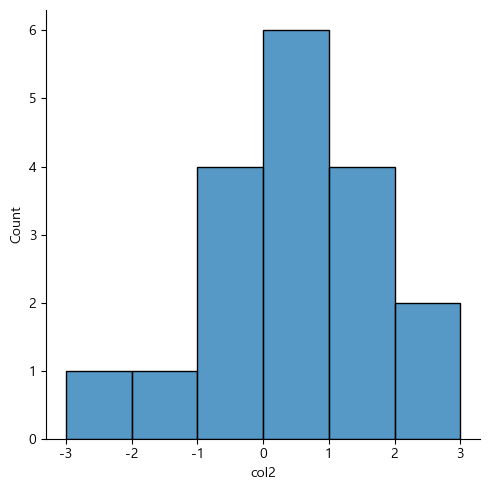

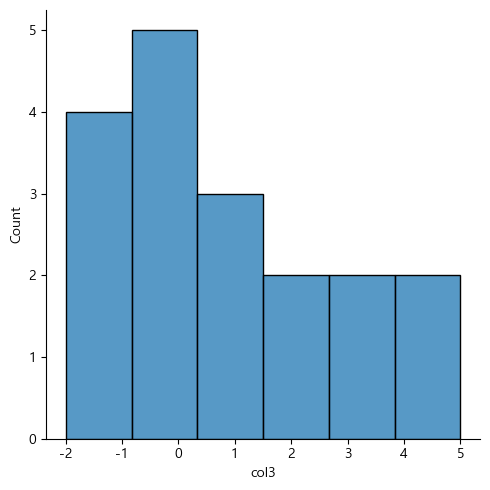

In [12]:
sns.displot(df['col1'])
sns.displot(df['col2'])
sns.displot(df['col3'])
df.skew() # 음수: 오른쪽으로 치우침, 0 치우치지 않음, 양수: 왼쪽으로 치우침
df.kurtosis() #음수: 평평, 0: 정규 분포, 양수: 뾰족